In [2]:
import numpy as np

def generate_sine_wave(amplitud, phase, freq, sample_rate, duration, offset):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = t * freq
    # 2pi because np.sin takes radians
    s = amplitud * np.sin((2 * np.pi) * frequencies + phase) + offset
    return t, s

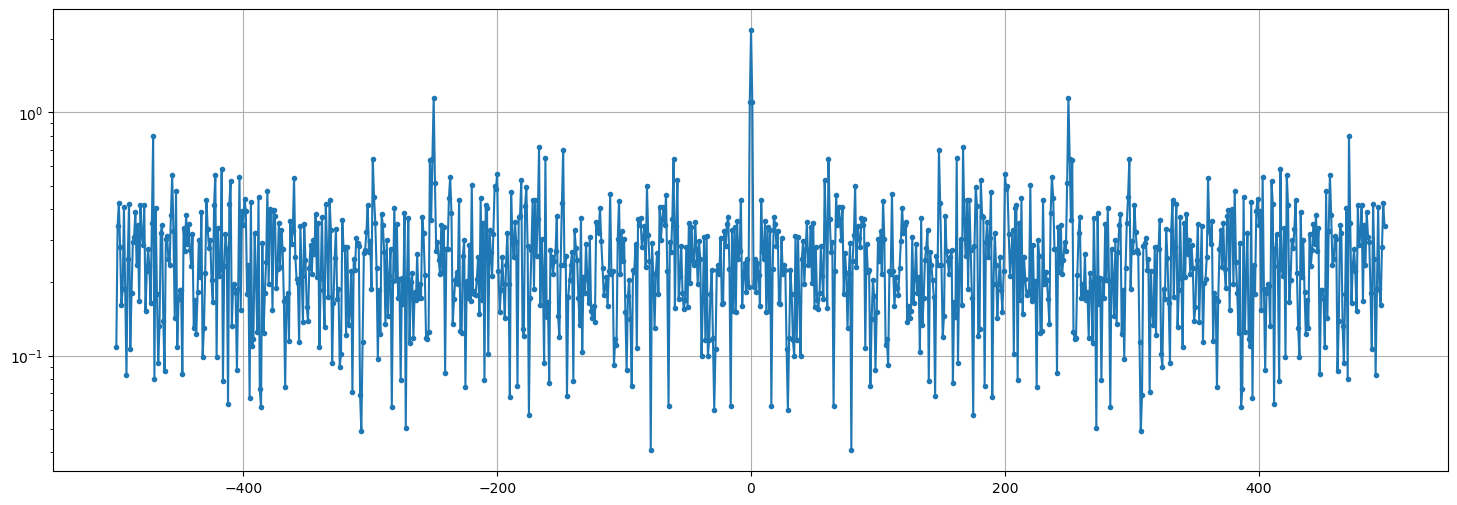

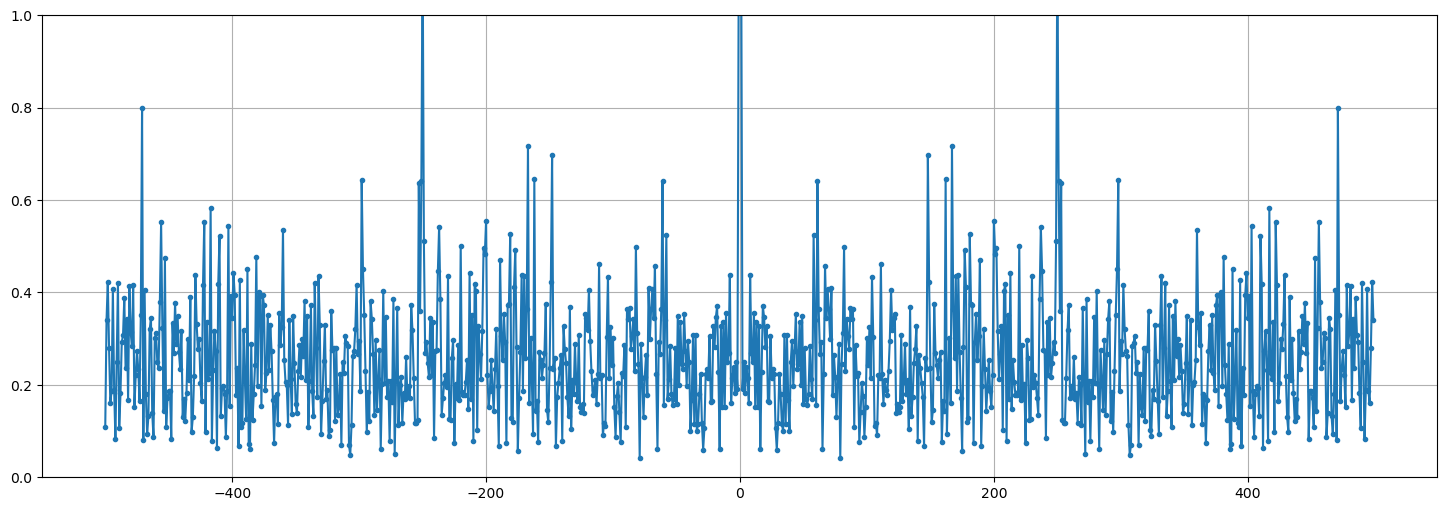

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1000 # Hz


t, s1 = generate_sine_wave(1, 0, 250, Fs, 1, 1)

t, s2 = generate_sine_wave(1, np.pi/4, 250, Fs, 1, -0.002)

t, s3 = generate_sine_wave(0.25, np.pi/4, 350, Fs, 1, 0.002)

s = (s1) * np.hamming(len(s1))

def plot_fft(signal, Fs):
    S = np.fft.fftshift(np.fft.fft(signal))
    S_mag = (1/270) * np.abs(S)
    S_phase = np.angle(S)
    f = np.arange(Fs/-2, Fs/2, Fs/len(s))


    plt.rcParams['figure.figsize'] = [18, 6]
    plt.ylim(0, 1)
    plt.grid()
    plt.figure(0)
    plt.semilogy(f, S_mag,'.-')

    plt.grid()
    plt.figure(1)
    plt.plot(f, S_mag,'.-')


    plt.show()

def add_awgn(signal_in, snr_db):

    # Calculate signal power and convert to dB 
    sig_avg_watts = np.mean(signal_in**2)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    # Calculate noise according to [2] then convert to watts
    noise_avg_db = sig_avg_db - snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    # Generate an sample of white noise
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(signal_in))
    # Noise up the original signal
    signal_out = signal_in + noise_volts
    return signal_out

s_out = add_awgn(s, -10) 
plot_fft(s_out, Fs)  